In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv")

In [3]:
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [5]:
data.to_csv(r"C:\Users\pavan\Desktop\Mounika\Learning\YouTube\Multiple Linear regression\Hiring.csv",index= False)


In [11]:
hiring = pd.read_csv("Hiring.csv")

In [12]:
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [13]:
hiring.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [14]:
hiring['experience'].value_counts()

five      1
two       1
seven     1
three     1
ten       1
eleven    1
Name: experience, dtype: int64

In [15]:
hiring['experience'].mode()

0    eleven
1      five
2     seven
3       ten
4     three
5       two
dtype: object

In [16]:
# in experience - I am not filling with mean /median bcz its their experience might be freshers also
# so i am filling with 0

hiring['experience'] = hiring['experience'].fillna("zero")

In [17]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
# converting the words to numbers in expereince



In [24]:
pip install word2number==1.1

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5580 sha256=6d72dd6df57a8df164ac07df30f08378699b7177fb36710361f6595b67c61d58
  Stored in directory: c:\users\pavan\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [26]:
import word2number

In [27]:
from word2number import w2n

In [33]:
hiring['experience'] = hiring['experience'].apply(w2n.word_to_num)

In [34]:
hiring.dtypes

experience                      int64
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [36]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


<AxesSubplot:ylabel='Density'>

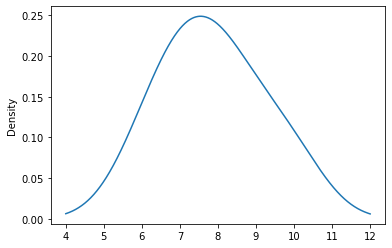

In [38]:
# I can see missing value in test_score , we can do it either mean /median

hiring['test_score(out of 10)'].plot(kind= 'kde')

In [39]:
hiring['test_score(out of 10)'].mean()

7.857142857142857

In [40]:
hiring['test_score(out of 10)'].median()

8.0

In [41]:
hiring['test_score(out of 10)'] = hiring['test_score(out of 10)'].fillna(hiring['test_score(out of 10)'].median())

In [42]:
hiring

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


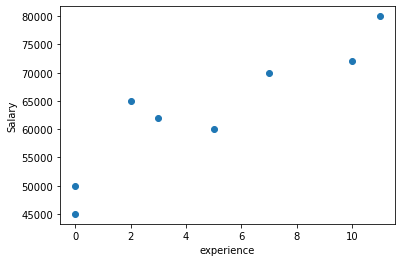

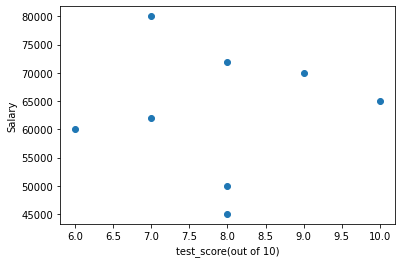

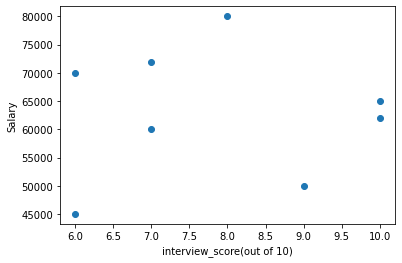

In [70]:
cols = ['experience','test_score(out of 10)','interview_score(out of 10)']
for i in cols:
    plt.scatter(hiring[i], hiring['salary($)'])
    plt.xlabel(i)
    plt.ylabel("Salary")
    plt.show()

In [77]:
# if expereince is high , their salary also high
# if test score is high , their salary also high
# if interview score is high , their salary also high


In [43]:
X = hiring.drop('salary($)',axis=1)
y = hiring['salary($)']

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [71]:
model.fit(X,y)

LinearRegression()

In [72]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [73]:
model.intercept_

17737.263464337688

In [80]:
# 2 years 9 test score , 6 interview score

model.coef_[0] * 2 + model.coef_[1] * 9 + model.coef_[2] * 6 + model.intercept_

53205.96797671033

### 2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [75]:
model.predict([[2,9,6]])

array([53205.96797671])

In [96]:
model.predict([[12,10,10]])

array([92002.18340611])

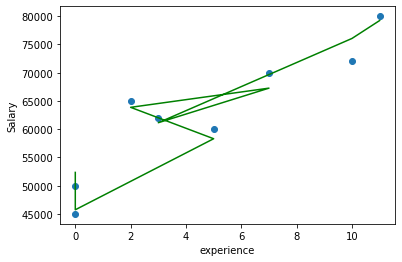

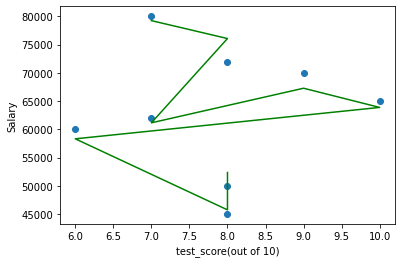

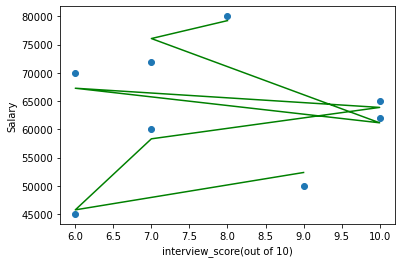

In [97]:
cols = ['experience','test_score(out of 10)','interview_score(out of 10)']
for i in cols:
    plt.scatter(hiring[i], hiring['salary($)'])
    plt.plot(hiring[i], model.predict(hiring[cols]), color= "green")
    plt.xlabel(i)
    plt.ylabel("Salary")
    plt.show()